In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

data_train = pd.read_csv('data/train.csv', dtype=int) # read train data
data_test = pd.read_csv('data/test.csv', dtype=int) # read test data


##### How many images are in the data set? What is the dimension of the feature vector and what are the features?

Ans: There are 60000 images in training dataset and 10000 images in test dataset. But there are only 10 varities of images that are in label coloumn in this dataset. There are 784 pixcels which represents one image. The Xtrain features dimension is 60000 X 784. Where as X_test feature dimension is 10000 X 784.The features are Pixels in the dataset.

In [2]:
data_train.head()
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def get_data_labels(labels):
    text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

###### (b) Before it is possible to design a classifer, it is necessary to divide the data into label and feature sets. This may be done with the following code:

In [4]:
X_train = data_train.iloc[:,0:784].values
y_train = data_train.iloc[:, 0].values
X_test = data_test.iloc[:, 0:784].values
y_test = data_test.iloc[:, 0].values
print(X_train.shape); print(X_test.shape)

(60000, 784)
(10000, 784)


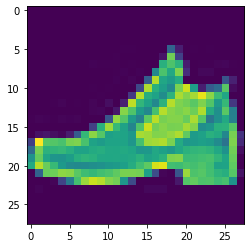

Label  9


In [5]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']
plt.imshow(X_train.iloc[1,:].values.reshape([28,28])) 
plt.show()
print('Label ',y_train[1])

###### 2(a) Design a deep decision tree classifer using the test data X_test and y_test. Begin by using the default values for all hyper parameters as follows:

In [8]:
Tree_model = DecisionTreeClassifier()
x=Tree_model.fit(X_train,y_train)

###### b) Determine the accuracy of your model on the training data.
Evaluate the training accuracy. the accuracy is one. This gives an idea that our model overfitted. Lets us evaluate in detail using confusion matrix for more details.

In [11]:
Tree_model_accuracy = (x.predict(X_train) == y_train).mean()
print('Training accuracy = ',Tree_model_accuracy)

Training accuracy =  1.0


Model accuracy can be estimated by using confusion matirx.
Ans: This confusion matrix looks perfect, since most images are on the main diagonal, which means that they were classified absolutely correct. That means there are overfitting.

[[6000    0    0    0    0    0    0    0    0    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [   0    0 6000    0    0    0    0    0    0    0]
 [   0    0    0 6000    0    0    0    0    0    0]
 [   0    0    0    0 6000    0    0    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [   0    0    0    0    0    0 6000    0    0    0]
 [   0    0    0    0    0    0    0 6000    0    0]
 [   0    0    0    0    0    0    0    0 6000    0]
 [   0    0    0    0    0    0    0    0    0 6000]]


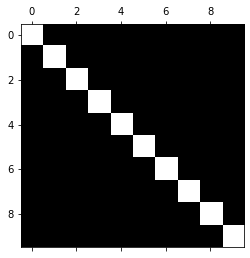

In [9]:
conf_mx= confusion_matrix(Tree_model.predict(X_train),y_train)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
plt.show()

##### 2(c) Cross Validation 
Does it appear that your decision tree is either underfitting or overfitting the data?Explain.

ans: The decesion Tree is right now Overfitting. The mean accuracy tell that my model for this data has poor performance this is because we did not set any limit to the growth of the of the decision tree.

In [12]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=x, X=X_train, y=y_train, cv=5) 

In [13]:
print(all_accuracies)
print(all_accuracies.mean())

[0.78858333 0.79125    0.7925     0.7985     0.79008333]
0.7921833333333334


##### 2(d) Repeat part (a) and remodel the classifier using growth limit.
Minimum sample leaf = 5 and max depth of 12 was set. The accuracy was around 87%.After looking at the new training accuracy, we can say that the model is now not overfitting like before. Event though the model is not the best, we managed to remove the overfitting by limiting the growth of the decision tree.

In [90]:
Tree_models = DecisionTreeClassifier(min_samples_leaf=5,max_depth=12).fit(X_train,y_train)
Tree_models_accuracy = (Tree_models.predict(X_train) == y_train).mean()
print('Training accuracy = ',Tree_models_accuracy)
all_accuracies1 = cross_val_score(estimator=Tree_model, X=X_train, y=y_train, cv=5)

print(all_accuracies1)
print(all_accuracies1.mean())


Training accuracy =  0.8759833333333333
[0.81375    0.81025    0.81841667 0.81666667 0.81283333]
0.8143833333333333


##### 2(e) This is a Confusion matrix with Little variation in the image. 
This says that even though we have introduced the growth limiters we are still facing a problem in the performance.Instead of randomly selecting the values of the parameters, a better approach would be to use a procedure that automatically finds the best parameters for a particular model.

[[5361   41   69  229   29    6  752    7   34   12]
 [   6 5750    6   27   12    1    5    0   10    1]
 [  67   16 4673   70  576    3  597    0   39    7]
 [ 127  137   46 5367  268   10  119    0   34    3]
 [  45   16  803  176 4781    1  591    0   52    2]
 [   7    7    5    4    4 5682    8   85   18   43]
 [ 365   25  371  113  311    7 3878    0   69    8]
 [   3    2    1    0    0  211    1 5756   20  318]
 [  18    5   24   11   19   30   46   15 5717   12]
 [   1    1    2    3    0   49    3  137    7 5594]]


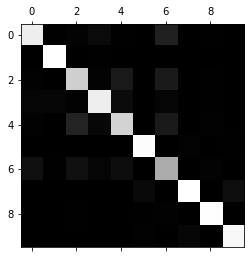

In [15]:
conf_mx= confusion_matrix(Tree_model.predict(X_train),y_train)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(conf_mx)
plt.show()

#### If we look at the image we can notice that few diagonals are grey in color and also sqaures like (2,4),(4,2),(4,6),(2,6) and (0,6) are confused.

###### 2(f) The Grid Search shows that Best criterian is entropy with max depth of 15 and mid sample leaf of 20.

In [17]:
grid_param = { 'min_samples_leaf':[5, 10, 15, 20], 'max_depth':[5, 10, 15, 20], 
              'criterion': ['gini', 'entropy'] }
gd_sr = GridSearchCV(estimator=Tree_model, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 20}
0.8149666666666666


##### 3(a): Use AdaBoostClassifier to design a strong classifier using the training data (X_train,y_train) created in part (a). Use a decision stump as the base classifier, and set n_estimators=300.
It is clear that the desicion stumps training accuracy is less than 50%

In [18]:
ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

##### 3(b) Determine the accuracy of your model on the training data and estimate the expected error using cross-validation.
ans= the cross validation error is around 60%

In [20]:
ada_clf_accuracy = (ada_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',ada_clf_accuracy)

all_accuracies = cross_val_score(estimator=ada_clf, X=X_train, y=y_train, cv=5)
print(all_accuracies)


Training accuracy =  0.4201
[0.41875    0.43483333 0.47791667 0.41808333 0.39991667]


###### 3(c) Use the grid search algorithm to determine the best number of estimators to use, and plot the validation error as a function of the number of estimators.

In [27]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                            "n_estimators": [50,100,200]}

tree_model = DecisionTreeClassifier(max_depth = 1, class_weight = "balanced")

ada_clf = AdaBoostClassifier(base_estimator = tree_model)

# run grid search
gd_sr_ada = GridSearchCV(ada_clf, param_grid=param_grid, scoring = 'accuracy',cv=5, n_jobs=-1)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
                                                                                min_weight_fraction_leaf=0.0,
                                                                                presort=False,
                                                                                random_state=None,
                                                                                splitter='best'),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'n_estimators': [50,100,200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
gd_sr_ada.fit(X_train, y_train)
best_parameters = gd_sr_ada.best_params_
print(best_parameters)
best_result = gd_sr_ada.best_score_
print(best_result)

###### The result after running the above code
{'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 200}

###### 3(d)Analyze and comment on your results. How do your results change if you were to use a decision tree with a maximum depth of two instead of one as you have with a decision Stump classifier?

In [29]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200,
algorithm="SAMME.R")
ada_clf.fit(X_train, y_train)
ada_clf_accuracy = (ada_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',ada_clf_accuracy)

Training accuracy =  0.6051666666666666


#####  4(a) Use RandomForestClassifier to design a strong classifier using the data (X_train,y_train) created in the boosting exercise.

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)

grid_param = { 'min_samples_leaf':[5, 10, 15, 20], 'max_depth':[5, 10, 15, 20], 
              'criterion': ['gini', 'entropy'] }
gd_sr = GridSearchCV(estimator= rnd_clf, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'max_depth': 20, 'min_samples_leaf': 10}

0.8735333333333334

OOB score when number of trees is 100

In [57]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)
print("out of Bag score",rnd_clf.oob_score_)
rnd_clf_accuracy = (rnd_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',rnd_clf_accuracy)


out of Bag score 0.5678
Training accuracy =  0.572


OOB score when number of tree is 200

In [58]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)
print("out of Bag score",rnd_clf.oob_score_)
rnd_clf_accuracy = (rnd_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',rnd_clf_accuracy)

out of Bag score 0.6103
Training accuracy =  0.62165


OOB score when number of tree is 300

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=300, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)
print("out of Bag score",rnd_clf.oob_score_)
rnd_clf_accuracy = (rnd_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',rnd_clf_accuracy)

out of Bag score 0.605
Training accuracy =  0.6143833333333333


OOB score when number of tree is 500

In [60]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)
print("out of Bag score",rnd_clf.oob_score_)
rnd_clf_accuracy = (rnd_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',rnd_clf_accuracy)

out of Bag score 0.6116
Training accuracy =  0.6205666666666667


##### For modeling purpose max_depth with right value is choosen

In [92]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train, y_train)
print("out of Bag score",rnd_clf.oob_score_)
rnd_clf_accuracy = (rnd_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',rnd_clf_accuracy)


out of Bag score 0.8809833333333333
Training accuracy =  0.9933


###### 4(b)Investigate the effect of the number of trees and the number of features used in the design of each tree on the performance of your classifier. Describe/document what you find.

Ans:The OOB score is computed as the number of correctly predicted rows from the out of bag sample. So the score shows 59% of used data from the unusead data. Therefore we can say that only 59 Percent of features were used to design the performance of the model.From the results above we can say that as number of trees increases the OOB value increases. This means that when we increase the number of trees the selection of features is increasing respectively. 
###### At n_estimators = 100 we got oob as 59.60% and performance was 59.62%
###### At n_estimators = 200 we got oob as 59.62% and performance was 59.62%
###### At n_estimators = 300 we got oob as 60.28% and performance was 61.05%
###### At n_estimators = 500 we got oob as 60.85% and performance  was 61.5%
These results prove there will be an effect on performance of the model when trees and Features used in the design cahnges!

#### Note: I choose hyper parameter max_depth= 2 for significant change in the values. The max_depth=15 is choosen in the end for model develpoment


###### 5(a)  Repeat parts (a) and (b) in the random forest exercise above.

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
#
et_clf = ExtraTreesClassifier(n_estimators=100, max_depth=10,
min_samples_split=2,bootstrap= True, n_jobs=-1,oob_score=True)
et_clf.fit(X_train, y_train)
print("out of Bag score",et_clf.oob_score_)
et_clf_accuracy = (et_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',et_clf_accuracy)


out of Bag score 0.8318666666666666
Training accuracy =  0.8590666666666666


In [45]:
grid_param = { 'min_samples_leaf':[5, 10, 15, 20], 'max_depth':[5, 10, 15, 20], 
              'criterion': ['gini', 'entropy'] }
gd_sr = GridSearchCV(estimator=et_clf, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best _params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
0.8651166666666666


Let us adjust the max depth and min sample leaf and run the model with various estimators and see the performances.

OOB score when number of tree is 100

In [62]:
et_clf = ExtraTreesClassifier(n_estimators=100, max_depth=2,
min_samples_split=2, min_samples_leaf= 5, bootstrap= True, n_jobs=-1,oob_score=True)
et_clf.fit(X_train, y_train)
print("out of Bag score",et_clf.oob_score_)
et_clf_accuracy = (et_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',et_clf_accuracy)

out of Bag score 0.56025
Training accuracy =  0.5639666666666666


OOB score when number of tree is 300

In [63]:
et_clf = ExtraTreesClassifier(n_estimators=300, max_depth=2,
min_samples_split=2, min_samples_leaf= 5, bootstrap= True, n_jobs=-1,oob_score=True)
et_clf.fit(X_train, y_train)
print("out of Bag score",et_clf.oob_score_)
et_clf_accuracy = (et_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',et_clf_accuracy)

out of Bag score 0.5827
Training accuracy =  0.5860333333333333


The values above are choosen for understanding the estimator importance. For calucucation purpose the we choose the estimator=200 and max depth=20, sampe leaf=5

In [65]:
et_clf = ExtraTreesClassifier(n_estimators=200, max_depth=20,
min_samples_split=2, min_samples_leaf= 5, bootstrap= True, n_jobs=-1,oob_score=True)
et_clf.fit(X_train, y_train)
print("out of Bag score",et_clf.oob_score_)
et_clf_accuracy = (et_clf.predict(X_train) == y_train).mean()
print('Training accuracy = ',et_clf_accuracy)

out of Bag score 0.8662166666666666
Training accuracy =  0.9369666666666666


###### 5(b)Investigate the effect of the number of trees and the number of features used in the design of each tree on the performance of your classifier. Describe/document what you find.

Ans:Similar to the above conclusion, we got the same results proving that  the performance of the model is effected by features and trees.

hese results prove there will be an effect on performance of the model when trees and Features used in the design cahnges!


#### Gradient Boosting
Let us first find the best learning rate to handle our data.  We can explaint that our performance is getting better every time with a new classifier. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
                                    max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb_clf.score(X_train, y_train)))

Accuracy on training set: 0.902

###### Final Evaluation
Based on the evaluation I believe that these models can be modeled in a much better way with proper tuning of hyper parameters but due to lack for my PC long time consuming performance made me restricted to these results.  The better analyser is gradient boosting with 89% accuracy with the above hyper parameters.
###### Learning Rate must be inbetween 0.5 to 0.2 which is the best parameter for gradient boosting. The next best classifier is  random forest and extra tree.


In [ ]:
print("Accuracy on training set: {:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb_clf.score(X_test, y_test)))

Accuracy on training set: 0.902

Accuracy on training set: 0.898

In [71]:
print("Accuracy on training set: {:.3f}".format(et_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(et_clf.score(X_test, y_test)))

Accuracy on training set: 0.937
Accuracy on test set: 0.869


In [93]:
print("Accuracy on training set: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rnd_clf.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.883


In [73]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.605
Accuracy on test set: 0.603
